 ### 1) About the Dataset 
 
**Data Link:-** https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/code

    We Having Dataset of student which have been avalible on kaggle 
**Description:**

    The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.
    
* **Variable:**
    * **Hour Studies:-** The Total Number of hours spent studying by each student.
    * **Pervious Score:** The Socre Obtained by student in previous score.
    * **Extracurrcular Activities:** Whether the student pariticipates activities (Yes or No).
    * **Sleep Hour:** The Average number of hours of sleep the student had per day.
    * **Sample Question Paper Praticed:** The Number of sample question papers the student practiced.
    

* **Target Variable:** 
    * Performence metrics : A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance. 

![](https://th.bing.com/th/id/OIP.bHl_nCQmbAyLQwPJUPJQMwHaEK?w=317&h=180&c=7&r=0&o=5&dpr=1.5&pid=1.7)

### 2) Importing the standard Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sts
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### 3) Get some information about the dataset

In [3]:
df.shape

(10000, 6)

#### Shape of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


 **Observation :-** All the Feature are intiger and float type we no need to do type cast

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Observation:-** We can see there no any missing value in our dataset

In [6]:
df.duplicated().sum()

127

In [7]:
df.drop_duplicates(inplace = True)

**Observation:-** As We can see there having 127 duplicates value and wo drop that value

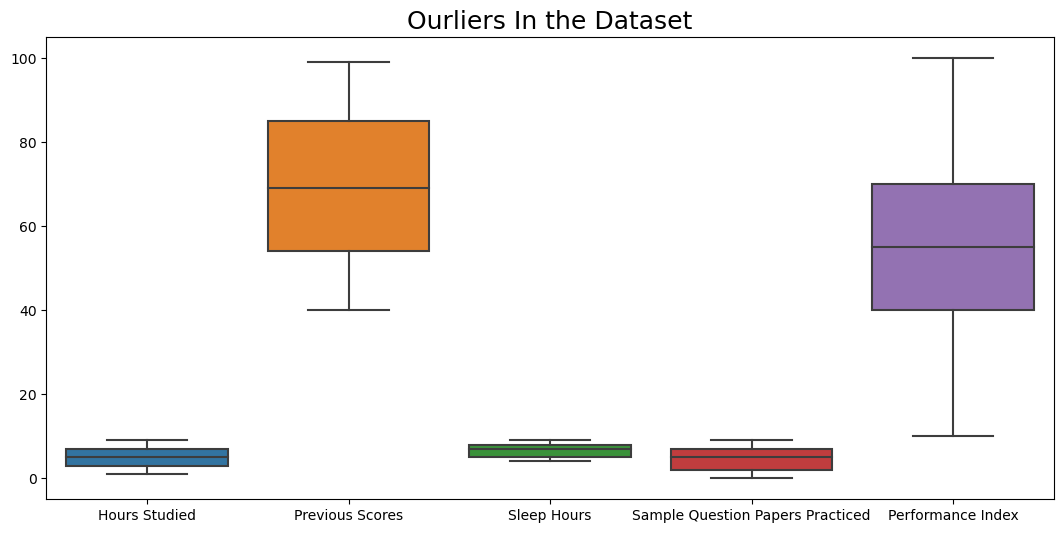

In [8]:
plt.figure(figsize = (13,6))
plt.title("Ourliers In the Dataset", fontsize = 18)
sns.boxplot(df)
plt.show()

**Observation:-** As we can see there having no outliers in the dataset

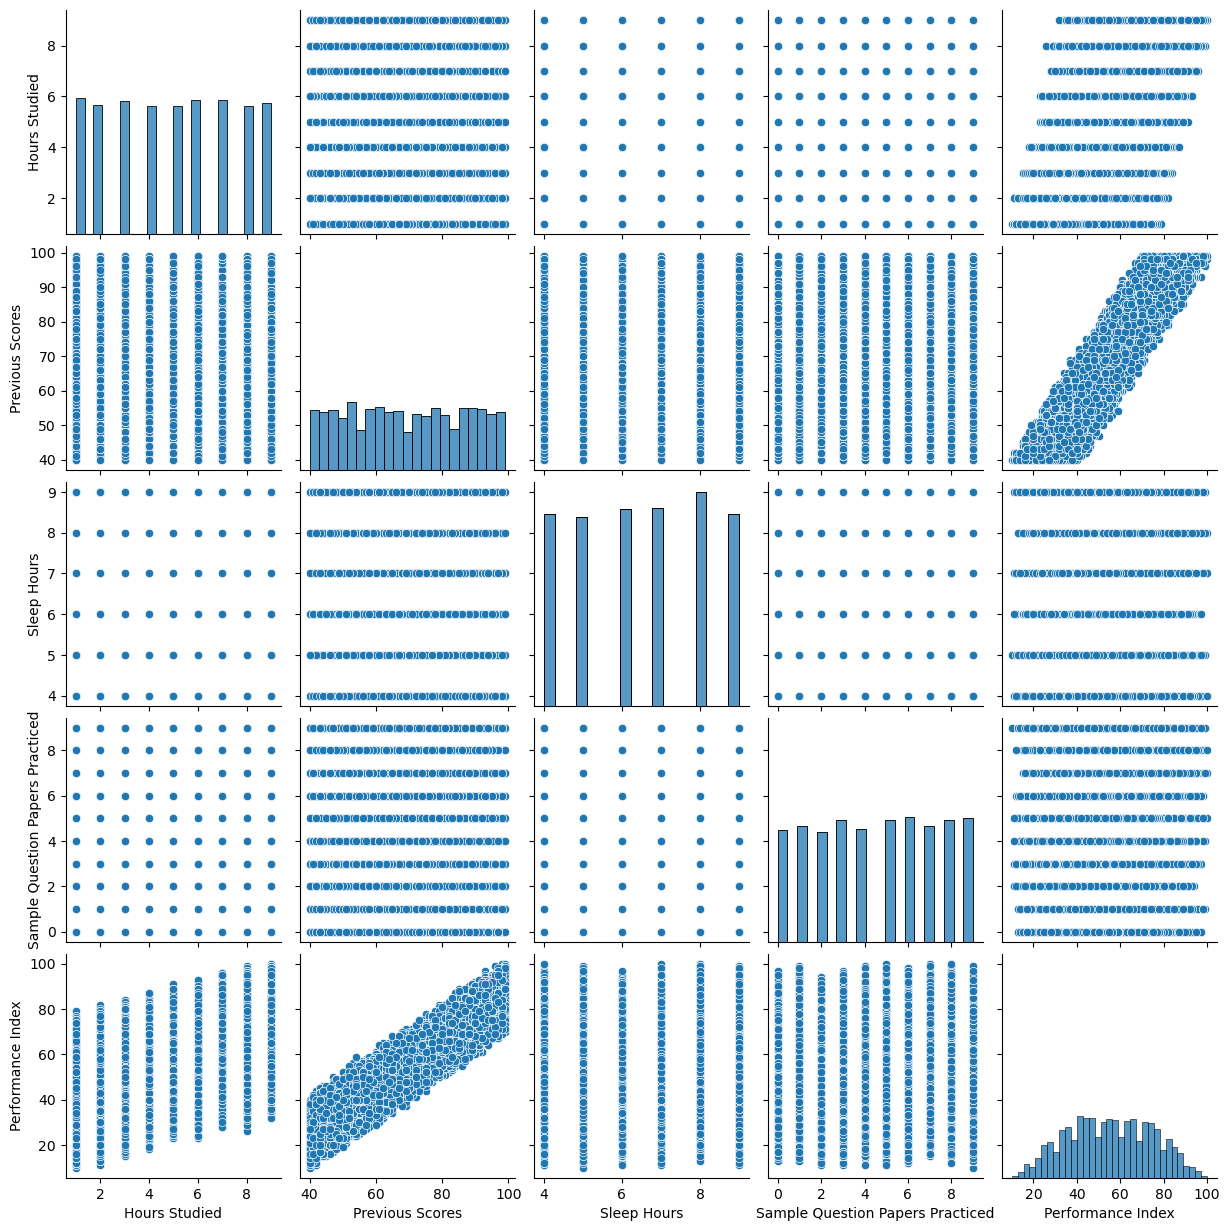

In [9]:
sns.pairplot(df)

#### Pairplot of the dataset

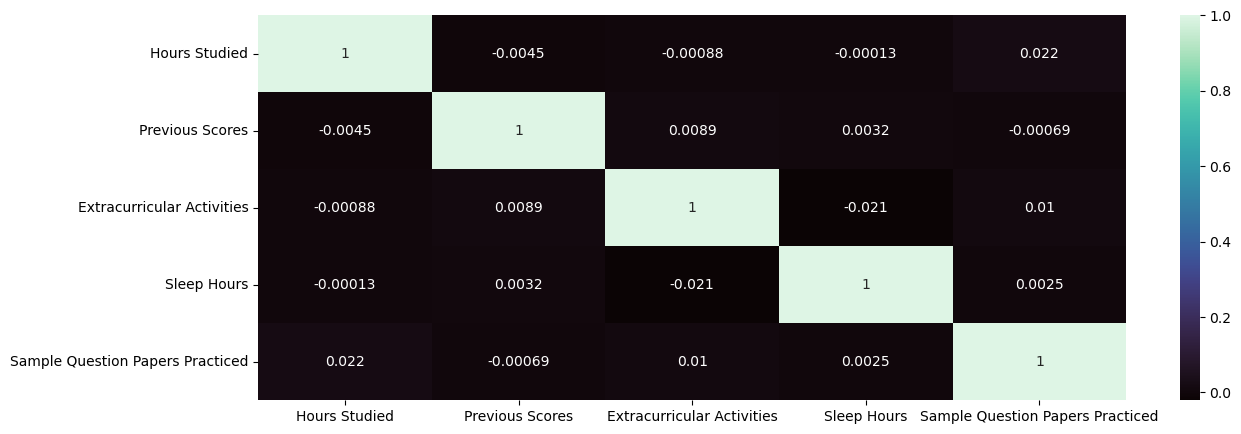

In [36]:
plt.figure(figsize = (14,5))
sns.heatmap(x_train.corr(), annot = True , cmap = 'mako')
plt.show()

#### As we can see from the corelation Performence Index with Hours Studies and Performence with previous score is highily correlated

In [ ]:
### Copping the dataset in new frameword
clean_df = df.copy()

### 4) Seperating the Dependent & Independent Feature

In [13]:
x = df[df.columns[0:5]]
y = df['Performance Index']

**Observation:-** We have the Split the Dependent Feature and Independent Feature In Different-Different Variables

### 5) Now We'll Split the Dataset into Train_test_Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 42 , test_size = 0.30)

In [16]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((6911, 5), (2962, 5), (6911,), (2962,))

### 5) Now We'll Move Toword the Feature Engineering

In [17]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

**Observation / Ingisights:-** As we can see the Extracurricular Activities contains only Yes or No value so we need to use Feature Engineering for Extracurricular Activities and the best suitable preprocessing technique for curricular Activities is Label Encoding.

#### Label Encoding for Extracurricular Activities

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
LE = LabelEncoder()

In [134]:
LE

LabelEncoder()

In [138]:
x_train['Extracurricular Activities'] = LE.fit_transform(x_train[['Extracurricular Activities']])
x_test['Extracurricular Activities'] = LE.transform(x_test['Extracurricular Activities'])

In [22]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


#### MinMaxScaler for Hours Studied , Previous Scores , Extracurricular Activities , Sleep Hours , Performance Index

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
MMS = MinMaxScaler()
MMS

MinMaxScaler()

In [25]:
x_train[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced'
       ]]= MMS.fit_transform(x_train[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']])

In [26]:
x_test[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced'
       ]]= MMS.fit_transform(x_test[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']])

### 6) Creating the model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LR = LinearRegression()
LR

LinearRegression()

In [29]:
### Fitting the model
LR.fit(x_train , y_train)

LinearRegression()

In [30]:
print(f"My Intercept is for the Model is :{LR.intercept_}")
print(f"My Coeficiant is for the Model is :{LR.coef_}")

My Intercept is for the Model is :11.491703791242934
My Coeficiant is for the Model is :[22.79393076 60.07597174  0.55684553  2.35000699  1.74053014]


In [83]:
def plot_partial_dependency(feature, feature_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train[feature_name], y_train, color='blue', label='Actual')
    plt.scatter(x_train[feature_name], LR.predict(x_train), color='red', label='Predicted')
    plt.xlabel(feature_name)
    plt.ylabel('Performance Index')
    plt.title(f'{feature_name} vs Performance Index')
    plt.legend()
    plt.show()

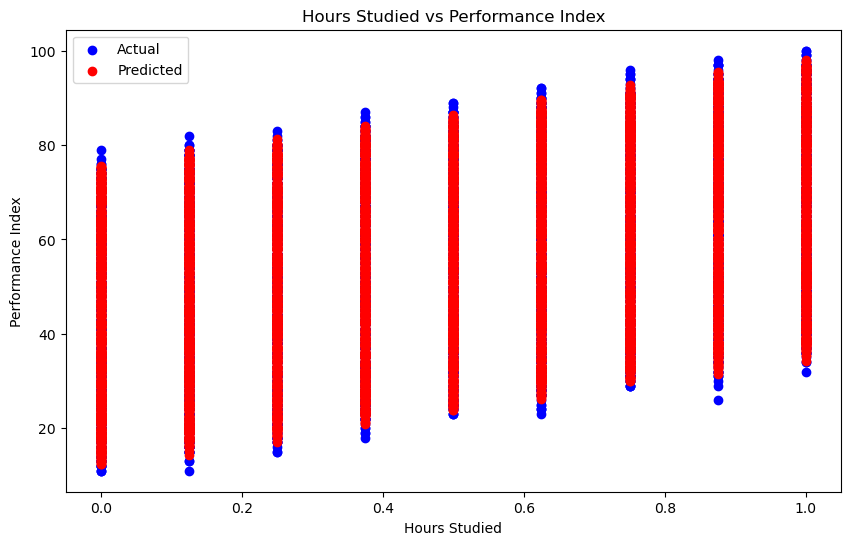

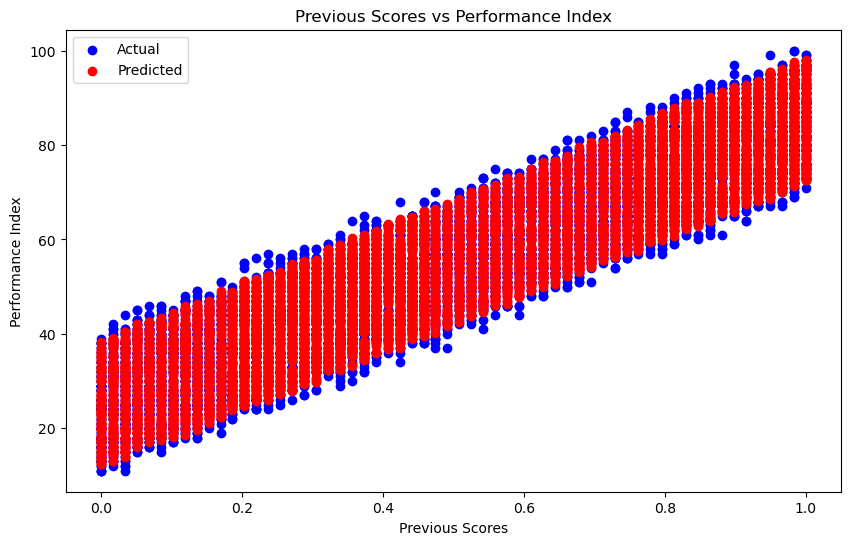

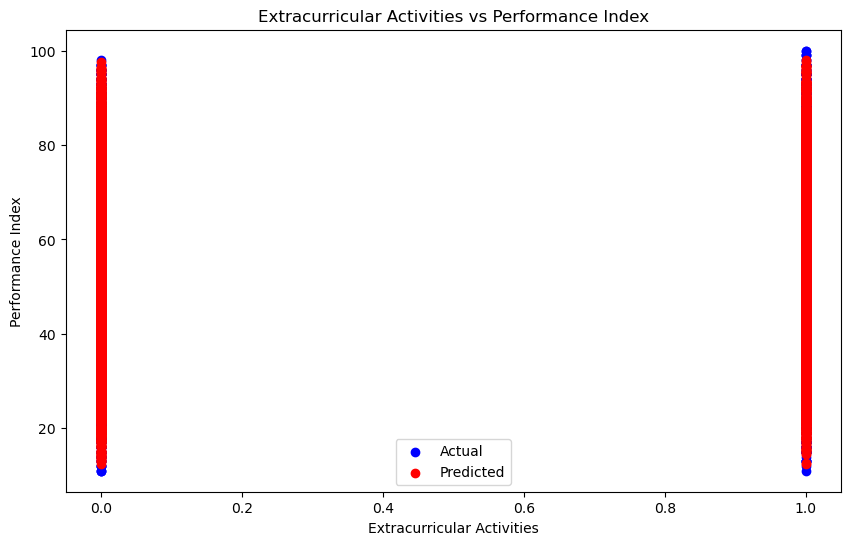

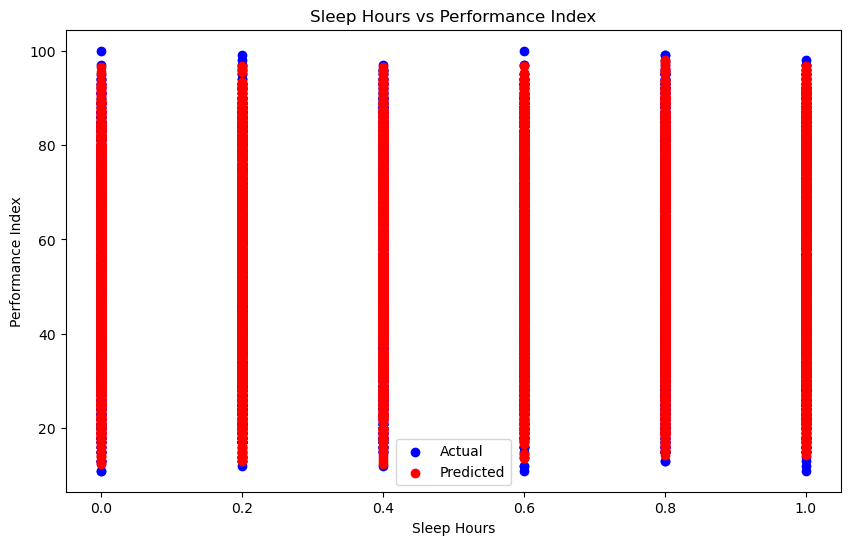

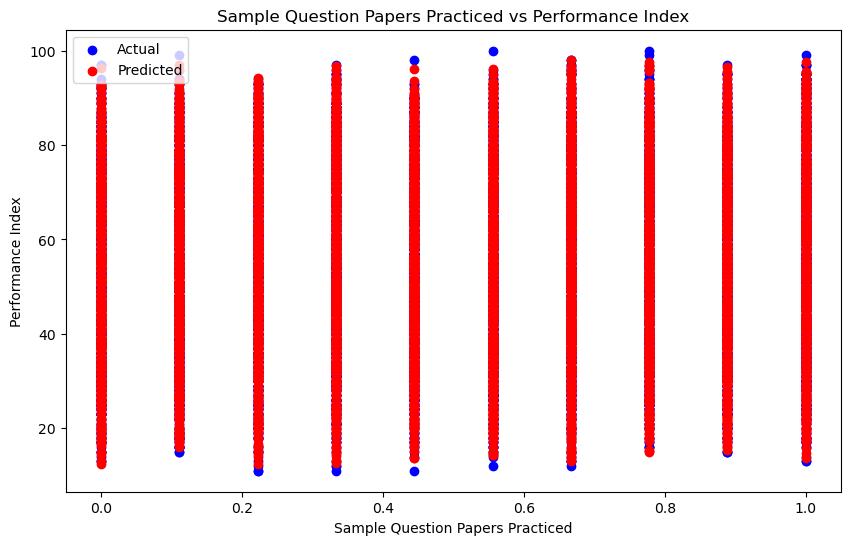

In [84]:
for i in x.columns:
    plot_partial_dependency(x_train[i],i )

### Let's Apply Method on Test 

In [39]:
y_pred = LR.predict(x_test)

In [69]:
temp_df = pd.DataFrame(y_pred, y_test).reset_index(drop = False)

In [77]:
temp_df.rename(columns = {temp_df.columns[1]:'Predictive Performance Index'},inplace = True)

In [78]:
temp_df.head()

,Performance Index,Predictive Performance Index
0,47.0,46.470919
1,76.0,80.249230
2,62.0,61.029966
3,23.0,22.732038
4,76.0,74.839305


### Now We'll Apply the Model on Test Datset

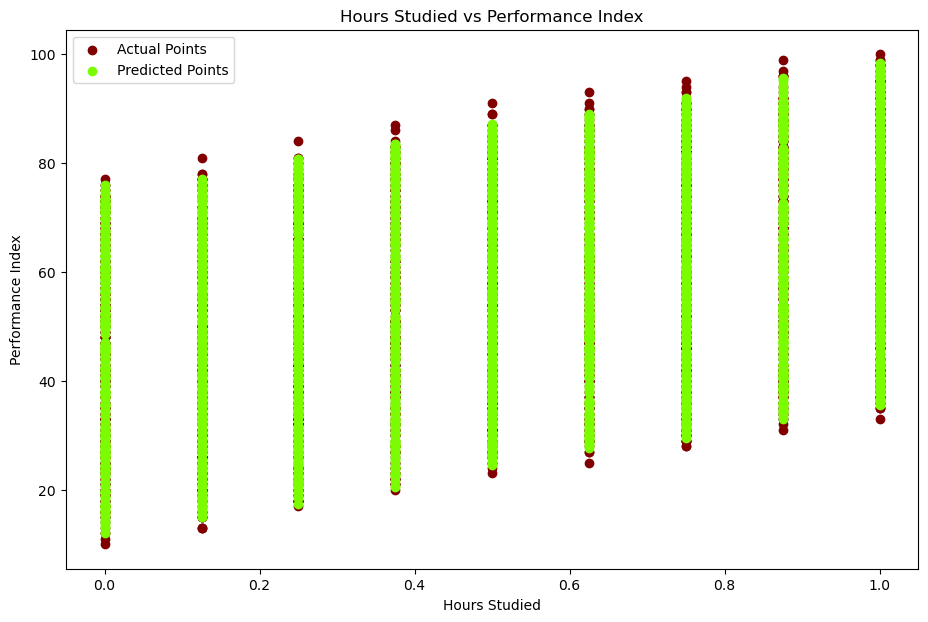

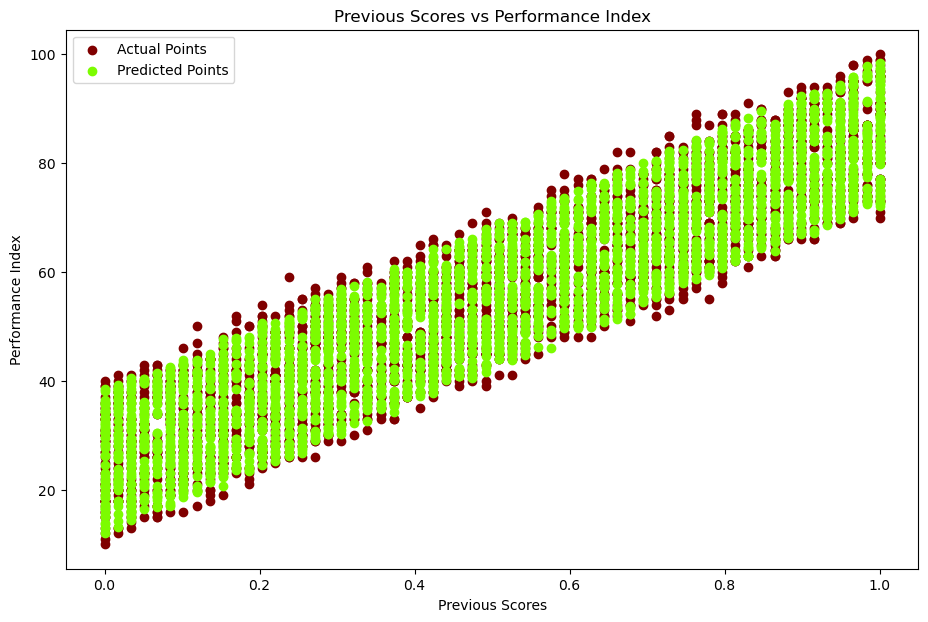

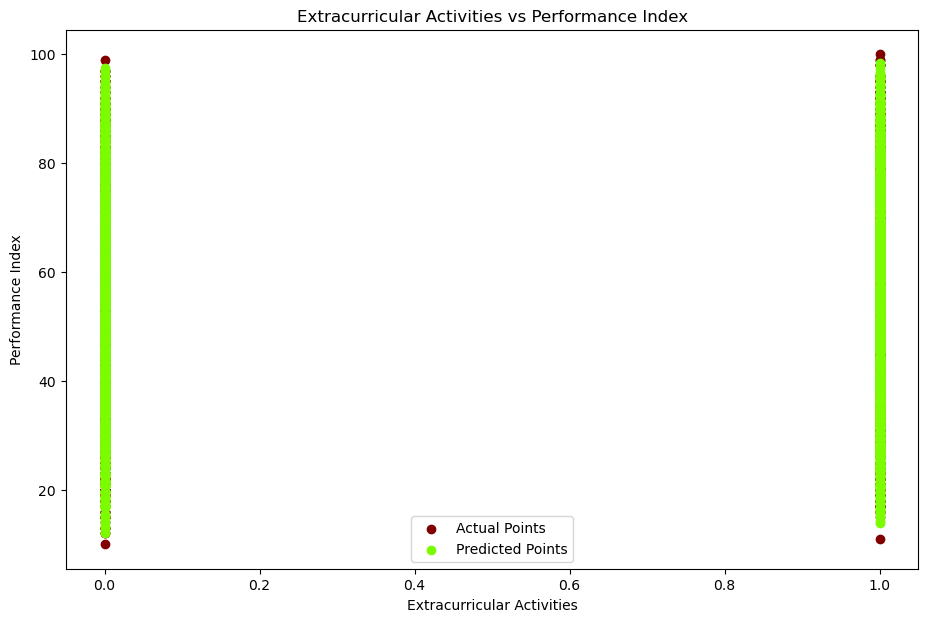

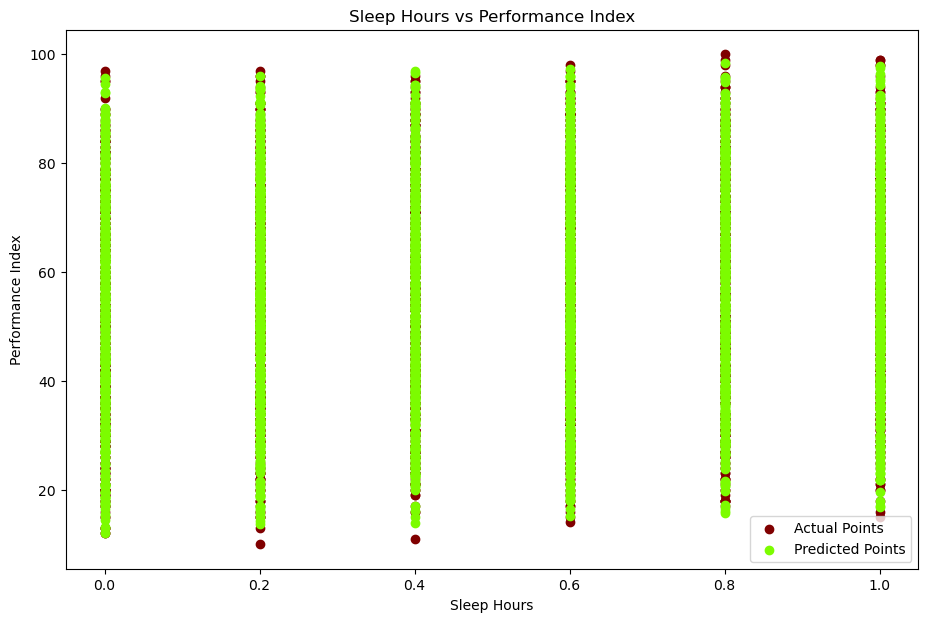

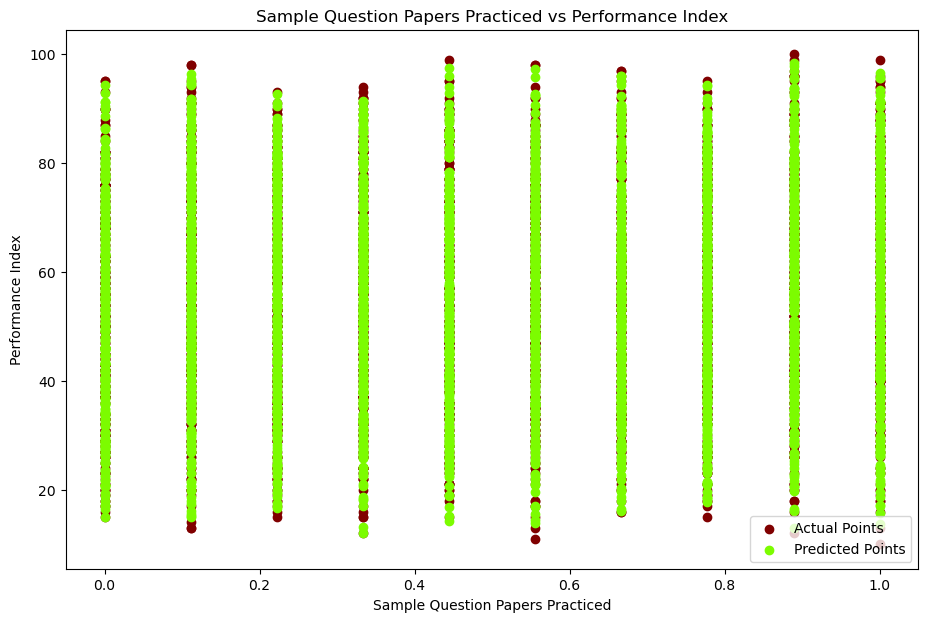

In [103]:
for i in x_test.columns:
    plt.figure(figsize = (11,7))
    plt.scatter(x_test[i], y_test, color = 'maroon', label = 'Actual Points')
    plt.scatter(x_test[i], LR.predict(x_test) , color = 'lawngreen' , label = 'Predicted Points')
    plt.xlabel(i)
    plt.ylabel('Performance Index')
    plt.title(f'{i} vs Performance Index')
    plt.legend()
    plt.plot()

### Let's Calculate the squared error

In [104]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [106]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)
print(f"My Mean Square Error is : {mse}")
print(f"My Mean Absolute Error is : {mae} ")
print(f"My Root Mean Square Error is :{rmse}")

My Mean Square Error is : 4.326180232071973
My Mean Absolute Error is : 1.6461997455341872 
My Root Mean Square Error is :2.0799471705002444


### Now We'll me Calulating the How Good is Our Model is 

In [107]:
from sklearn.metrics import r2_score

In [108]:
score = r2_score(y_test , y_pred)

In [109]:
score

0.9881593003934889

In [111]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [126]:
new_input = MMS.transform([[7,87,10,1]]) 

In [147]:
input_ = np.insert(new_input,2,1)
print(input_)

[0.75       0.79661017 1.         1.2        0.11111111]


In [152]:
print(f"The Performence Index is based on given data is :{LR.predict([input_])}")

The Performence Index is based on given data is :[80.01452805]


![](https://dontgetserious.com/wp-content/uploads/2021/07/funny-thank-you-memes--768x768.jpeg)